In [6]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using CSV, DelimitedFiles, DataFrames, JLD

┌ Error: Failed to revise /Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/src/utils.jl
│   exception = (ErrorException("lowering returned an error, \$(Expr(:error, \"more than one semicolon in argument list around /Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/src/utils.jl:1007\"))"), Union{Ptr{Nothing}, Base.InterpreterIP}[])
└ @ Revise /Users/mfanuel/.julia/packages/Revise/3RMhb/src/packagedef.jl:716
┌ Warning: The running code does not match the saved version for the following files:
│ 
│   /Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/src/utils.jl
│ 
│ If the error was due to evaluation order, it can sometimes be resolved by calling `Revise.retry()`.
│ Use Revise.errors() to report errors again. Only the first error in each file is shown.
│ Your prompt color may be yellow until the errors are resolved.
└ @ Revise /Users/mfanuel/.julia/packages/Revise/3RMhb/src/packagedef.jl:824


## Combinatorial Laplacian with random graphs

ER graph

In [8]:
rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


least eigenvalue: (ComplexF64[-0.07154784264768452 - 0.06986348267318689im, -0.07154784265417209 - 0.06986348267475347im, -0.07154784264245814 - 0.06986348267094625im, -0.0715478426543893 - 0.06986348267909848im, -0.07154784264813506 - 0.06986348267020105im, -0.0715478426380142 - 0.06986348266733616im, -0.07154784265809211 - 0.06986348269095725im, -0.07154784265040381 - 0.06986348266520044im, -0.07154784264284844 - 0.0698634826836358im, -0.07154784264284811 - 0.06986348267006148im, -0.07154784263522469 - 0.06986348266808051im, -0.07154784265725644 - 0.06986348267879511im, -0.07154784263400452 - 0.06986348267971im, -0.07154784264558414 - 0.06986348266369682im, -0.07154784265665608 - 0.06986348268030271im, -0.07154784264182083 - 0.06986348266239138im, -0.07154784265685687 - 0.06986348266869252im, -0.07154784264505575 - 0.0698634826711213im, -0.07154784264957634 - 0.06986348269009102im, -0.07154784265138882 - 0.06986348267627863im, -0.07154784266432851 - 0.06986348267959433im, -0.07154784

TypeError: TypeError: in keyword argument methods, expected Union{Nothing, String}, got a value of type Vector{String}

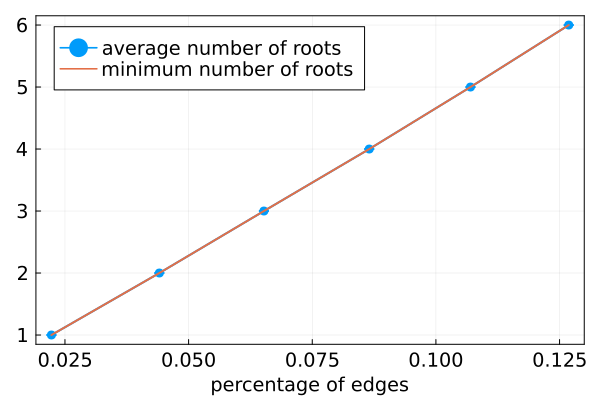

In [22]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

 SBM graph

least eigenvalue: (ComplexF64[0.024952134604441595 + 0.025122827862485222im, 0.024952252865307913 + 0.025122657556759895im, 0.024952200621333923 + 0.025122732792663215im, 0.02495219722457367 + 0.025122737684302735im, 0.02495216264618296 + 0.025122787479990673im, 0.024952203683780247 + 0.0251227283824932im, 0.02495214150631792 + 0.0251228179231722im, 0.02495213510380395 + 0.025122827143367162im, 0.024952168343642916 + 0.025122779275230878im, 0.024952140230461568 + 0.025122819760545662im, 0.02495217520123136 + 0.02512276939974767im, 0.02495220545156731 + 0.025122725836717298im, 0.024952139837465987 + 0.025122820326452997im, 0.024952170734417477 + 0.02512277583234318im, 0.024952216500644872 + 0.025122709925058936im, 0.02495219712676801 + 0.025122737825118115im, 0.024952160383759928 + 0.025122790738123967im, 0.024952225402734816 + 0.02512269710533458im, 0.024952170023971706 + 0.025122776855420782im, 0.024952193240410706 + 0.02512274342172971im, 0.02495222829247128 + 0.025122692943872506im,

, 0.024952176030314452 + 0.02512276820577068im, 0.024952141778691466 + 0.025122817530947614im, 0.024952176200225124 + 0.025122767961062675im, 0.024952138528831255 + 0.025122822210995304im, 0.024952108162424286 + 0.025122865941127916im, 0.024952143729970965 + 0.02512281472098351im, 0.024952203179580912 + 0.025122729108592853im, 0.0249522626890741 + 0.02512264340994381im, 0.024952159541885736 + 0.025122791950471013im, 0.024952167869857347 + 0.025122779957492392im, 0.024952106683223875 + 0.02512286807136122im, 0.0249522115918089 + 0.02512271699430313im, 0.024952115011322645 + 0.02512285607822183im, 0.024952160291758597 + 0.025122790870546124im, 0.024952174623144984 + 0.025122770232188795im, 0.0249521316331527 + 0.025122832141339074im, 0.024952163456846102 + 0.02512278631265809im, 0.02495214198327672 + 0.025122817236390434im, 0.024952130881024583 + 0.025122833224474207im, 0.024952140970778986 + 0.025122818694449617im, 0.024952137145066645 + 0.02512282420378672im, 0.02495210584397161 + 0.02

0.025122875081547955im, 0.02495214162417765 + 0.02512281775345972im, 0.02495210668895353 + 0.025122868063126552im, 0.024952167496623368 + 0.025122780494969795im, 0.024952198521635126 + 0.025122735816408347im, 0.02495216492617177 + 0.02512278419665727im, 0.024952174629784225 + 0.025122770222663494im, 0.024952108056665433 + 0.02512286609346778im, 0.02495210246108261 + 0.025122874151601388im, 0.024952209387024287 + 0.025122720169322692im, 0.02495222367420605 + 0.02512269959460133im, 0.025305117487474726 + 0.024614503077560152im, 0.025304857242910032 + 0.02461487785128177im, 0.025304243076211062 + 0.024615762302813066im, 0.025305022453138502 + 0.024614639934989285im, 0.025305026272527533 + 0.02461463443468298im, 0.025305104435306723 + 0.02461452187367001im, 0.02530527908906964 + 0.02461427035774153im, 0.025305288489788823 + 0.024614256819798144im, 0.025304114157481534 + 0.02461594795634798im, 0.02530505044706701 + 0.02461459962123443im, 0.02530514038729905 + 0.024614470099891886im, 0.02530

0.024614445600115584im, 0.025304272346851415 + 0.024615720150355482im, 0.02530504498548777 + 0.02461460748652255im, 0.025304279696942465 + 0.02461570956586669im, 0.025303292391436746 + 0.024617131367848846im, 0.02530501150056368 + 0.02461465570735172im, 0.02530499038395674 + 0.02461468611705531im, 0.025304837567784982 + 0.024614906185275388im, 0.025305015884065005 + 0.02461464939489221im, 0.025304971658979627 + 0.02461471308262887im, 0.025304992716163377 + 0.02461468275846764im, 0.02528771037923051 + 0.024639570764836062im, 0.02528845610060201 + 0.024638496863896315im, 0.025304891376672536 + 0.02461482869574194im, 0.02530509095457268 + 0.02461454128702162im, 0.02530519052600277 + 0.0246143978959386im, 0.025305420376932904 + 0.024614066891358515im, 0.025305073127113987 + 0.0246145669600855im, 0.025305021230273644 + 0.02461464169576826im, 0.02530514900234432 + 0.024614457693478784im, 0.025303773529603328 + 0.024616438488788858im, 0.025304880390325538 + 0.024614844517254448im, 0.025304799

, 0.025305122290448713 + 0.024614496160710594im, 0.02530515898231118 + 0.024614443321399972im, 0.025305212756521575 + 0.024614365882079166im, 0.025304986010896882 + 0.024614692414828006im, 0.025303732761920713 + 0.02461649719773435im, 0.02530530234090945 + 0.024614236873140162im, 0.02530502284195267 + 0.024614639374654187im, 0.02530428046806277 + 0.024615708455187887im, 0.0253042239537336 + 0.02461578984066836im, 0.02530500836689327 + 0.024614660220209007im, 0.025304021294612403 + 0.024616081686675468im, 0.025305022690017536 + 0.024614639593828366im, 0.025304871504503224 + 0.024614857313427847im, 0.025305046858942363 + 0.02461460478849716im, 0.025305042285121558 + 0.02461461137516303im, 0.025304882944195934 + 0.024614840839417403im, 0.025284667076760345 + 0.024643953374138917im, 0.025282172488296086 + 0.024647545789613468im, 0.025303851326800155 + 0.024616326454371968im, 0.02530499102944098 + 0.02461468518760727im, 0.025305147151371964 + 0.024614460359037624im, 0.025304877497558508 + 0

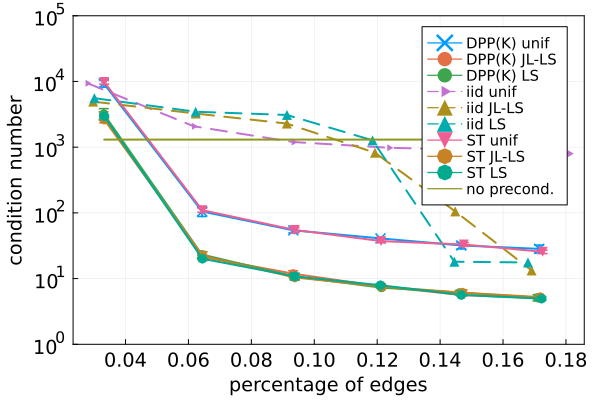

, 0.025305044967271224 + 0.024614607512681082im, 0.025303754410128484 + 0.024616466022466903im, 0.02530412524173427 + 0.024615931994092236im, 0.02530532112639509 + 0.02461420982044414im, 0.025304075289617357 + 0.024616003929223453im, 0.025305142384707963 + 0.024614467223283157im, 0.02530515802814971 + 0.02461444469557507im, 0.025304987870905626 + 0.024614689736184036im, 0.02530498462496453 + 0.024614694410760706im, 0.025305214398624487 + 0.024614363517298073im, 0.025305054491718656 + 0.024614593796554347im, 0.025305174076072516 + 0.024614421585304178im, 0.025303666276175137 + 0.024616592942777654im, 0.025305128475561933 + 0.024614487253722717im, 0.025305070580914815 + 0.02461457062679752im, 0.02530526381174302 + 0.024614292358324835im, 0.025303854949175 + 0.024616321237860676im, 0.025304949510919602 + 0.024614744977782814im, 0.025304987169131238 + 0.02461469074666243im, 0.02530368405411783 + 0.024616567341022813im, 0.02530388214710688 + 0.024616282070438533im, 0.02530377627047267 + 0.0

In [4]:
rng = Random.default_rng()

# graph parameters
c = [100 0.01 ;
0.01 20]
n = [400 ; 400]

# regularization parameter
q = 0.1

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"SBM"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


In [ ]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

## Magnetic Laplacian with random graphs

MUN graph model

least eigenvalue: (ComplexF64[-0.010626108900484028 + 0.09943430617423027im, 0.05848469023891637 + 0.08111628101989657im, -0.013730766149248489 + 0.09905287039050412im, 0.008347714943103452 + 0.09965179913222755im, 0.09999846080288236 - 0.0006081298307279903im, -0.04395356807591614 + 0.08982098473256435im, 0.01791465716617783 + 0.09838268393711126im, -0.03519498189976226 + 0.09360006231713013im, 0.05580126188526199 + 0.08298467182802272im, -0.019877539499972282 + 0.098003627693655im, 0.09827980701259362 + 0.01847223914862762im, 0.047743188895538954 + 0.087868159461361im, 0.09912352730303209 - 0.013210626606014839im, 0.08264340599791055 + 0.05630490460610047im, 0.002219897149265173 + 0.09997608332662904im, -0.0322289899140495 + 0.09466328528418647im, 0.06348353285533129 + 0.07726627803255597im, 0.08083441917807754 + 0.058873183276124806im, -0.06001271800872168 + 0.07998855888625224im, 0.09958854965399208 + 0.009068684308669096im, 0.09863491907169705 - 0.01646620773772399im, 0.0918508546

, -0.0009056237180625652 + 0.09999568272455689im, 0.01158893584576361 + 0.09932702508324763im, -0.007412021941080769 + 0.09972482929202135im, 0.027260729416451118 + 0.09621381432339071im, 0.03314754663236739 + 0.09434745432149484im, 0.07049380223763398 + 0.07092809529308149im, 0.07694835765467253 + 0.06386857353085836im, 0.09304401708094323 + 0.03664757153968631im, -0.023080573935952 + 0.09729886966002883im, 0.08387110952463085 - 0.054455808686631156im, 0.07200399887801467 - 0.06939038566343192im, -0.05750938341995284 + 0.0818065648965012im, 0.09579197865745133 - 0.028701186936000624im, 0.0682149924712502 + 0.07312285625790614im, 0.08444483651933586 + 0.053566667832248255im, 0.07405958120347104 - 0.06719223699013434im, -0.049459437580309865 + 0.08691053124690838im, 0.03025342886369933 + 0.09531451759807766im, 0.07635848286936504 - 0.06456861450143578im, 0.09485807247554616 - 0.03165259323786934im, 0.09976654753477807 - 0.006829116776245966im, 0.02405652858528569 + 0.0970643334276394im,

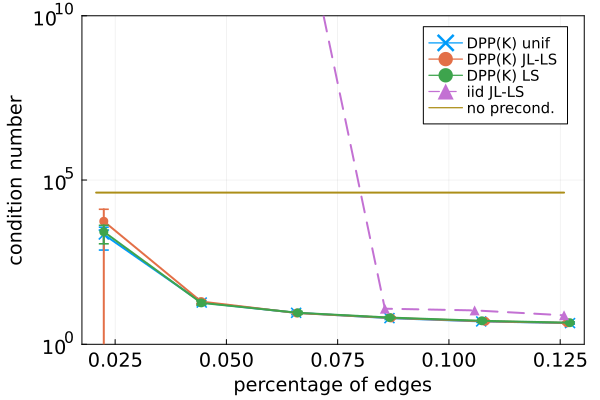

0.0965244301751812im, 0.07894403463074141 + 0.061385278479186206im, -0.052202488567439226 + 0.08529006874485169im, 0.08761712971990064 + 0.048202493046668876im, 0.09143581564171148 - 0.04048875542771994im, 0.08716878516394667 - 0.04900562972847613im, 0.0999335210581919 - 0.0036464218517784372im, -0.054850581129547896 + 0.08361205205713224im, -0.029202084957881513 + 0.09563976179942915im, 0.09258605398747341 - 0.03778604700606614im, -0.038182739962664254 + 0.09242250513208007im], 0.002355841695266923)


In [21]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-2

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e10)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


ERO graph model

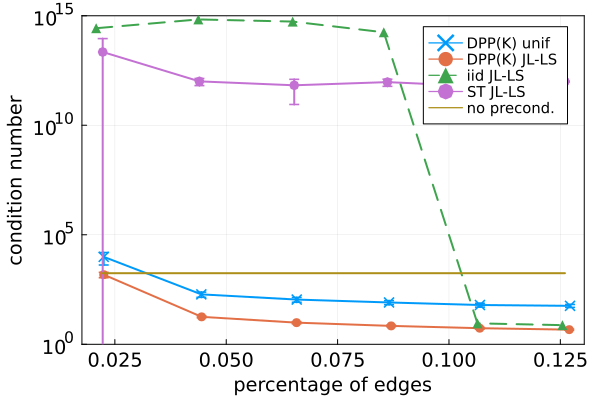

least eigenvalue: ([0.08812304421174394, -0.06683888755039892, 0.09850807253186597, -0.003322477727509529, 0.09726834848520355, -0.04597923608704563, 0.04852307368588725, -0.04315183510003257, -0.0001613263257936599, 0.08657495975667343, 0.09342656799083851, 0.10004332331409538, -0.019080902168033508, 0.021898444148941307, 0.04286897016053411, 0.08338396319520255, -0.06915186999556212, 0.09450249165386597, 0.024985027955168517, 0.09107361124859585, 0.056630289163441906, 0.09461392896020503, 0.09945419800844964, 0.075518613851301, 0.07952952739124054, 0.04571580979340533, 0.097962793047348, 0.09224699841471194, 0.08672293079468758, 0.10003833411512135, -0.04876999434971065, 0.03997926876059564, 0.09549771463884779, 0.08958206092601936, 0.037049084618226896, 0.09907758603017507, 0.08509597801092852, -0.02527160556587373, -0.022177404256942236, 0.03408136402460927, 0.08158731802035397, 0.07122001644709103, 0.08973156411857039, 0.0735992939246242, 0.09351768496881367, 0.02804649311853219, 

In [18]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalue
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", real.(l))

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


## Combinatorial Laplacian with a real graph


In [ ]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [ ]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

In [ ]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

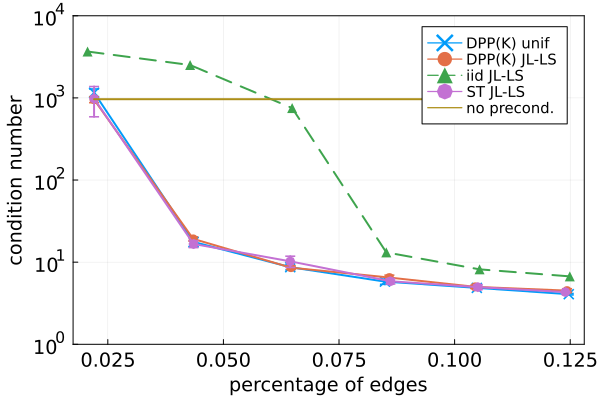

In [13]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0.1

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# average number of roots
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)